# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [5]:
# Load pickled data
import pickle

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [6]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
height = X_train.shape[1]
width = X_train.shape[2]
channels = X_train.shape[3]
image_shape = [height, width, channels]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

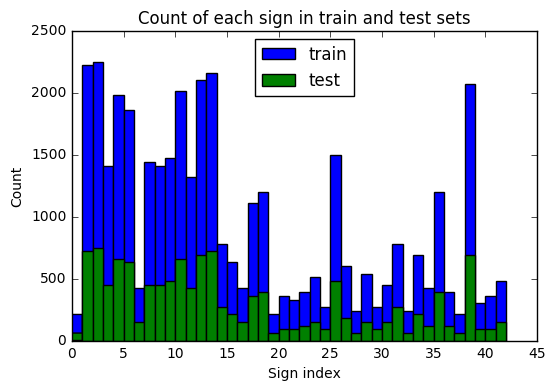

In [7]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

# plot the count of each sign in both train and test sets
plt.hist(y_train, bins=np.arange(y_train.min(), y_train.max()+1), label="train")
plt.hist(y_test, bins=np.arange(y_test.min(), y_test.max()+1), label="test")
plt.legend(loc="best")
plt.title("Count of each sign in train and test sets")
plt.xlabel("Sign index")
plt.ylabel("Count")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
from tqdm import tqdm

# Preprocess the data here.
def weighted_average(pixel):
    return [0.2126 * pixel[0] + 0.7152 * pixel[1] + 0.0722 * pixel[2]]

def greyed_image(image):
    grey = np.zeros((height, width, 1))
    for row in range(height):
        for col in range(width):
            grey[row][col] = weighted_average(image[row][col])
    return grey

In [9]:
# convert RGB (3 channels) to greyscale (1 channel)
images = []
for image in tqdm(X_train):
    grey_image = greyed_image(image)
    images.append(grey_image)
    
test_images = []
for image in tqdm(X_test):
    grey_image = greyed_image(image)
    test_images.append(grey_image)

100%|██████████| 12630/12630 [02:43<00:00, 77.19it/s]


In [11]:
# reformat labels
labels = np.zeros((n_train, n_classes))
for idx, num in enumerate(y_train):
    labels[idx][num] = 1.0
    
test_labels = np.zeros((n_test, n_classes))
for idx, num in enumerate(y_test):
    test_labels[idx][num] = 1.0

In [93]:
print(images[0][0])

[[  77.5066]
 [  75.7192]
 [  83.7152]
 [  93.408 ]
 [ 111.5288]
 [ 121.5762]
 [ 126.76  ]
 [ 137.6064]
 [ 159.2192]
 [ 231.3334]
 [ 251.424 ]
 [ 241.0056]
 [ 235.8062]
 [ 180.1844]
 [ 144.5598]
 [ 148.423 ]
 [ 175.685 ]
 [ 209.4368]
 [ 235.3518]
 [ 241.2772]
 [ 218.978 ]
 [ 182.8546]
 [ 133.012 ]
 [  90.6602]
 [  90.823 ]
 [ 101.2942]
 [  97.4136]
 [  85.651 ]
 [  76.937 ]
 [  72.4396]
 [  68.0774]
 [  66.7152]]


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

For the features, I converted RGB images to greyscale images because the colours do not matter much in classifying the traffic signs. Rather, the shapes (circles etc.) play a greater role in the process. it would also make training less time consuming. The conversion formula comes from the ITU-R Rec. 709. See https://www.w3.org/Graphics/Color/sRGB for more information.

For the labels, I applied one-hot encoding to the indices. Without this transformation, the lables would behave like ordinal variables, which is not desired. This encoding would keep the lables as nominal variables. 

In [55]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# dafault validation size 0.25
train_images, validation_images, train_labels, validation_labels = train_test_split(images, labels)
n_train = n_train * 0.75

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used the original testing data from the provided dataset. I split the original training data into training and validation data with a ratio of 1:3.

In [61]:
import tensorflow as tf

# hyperparameters
learning_rate = 0.001
epochs = 12
batch_size = 128

conv_size = 5
conv_filter_1 =  16
conv_filter_2 =  36
fully_in = 5 * 5 * conv_filter_2
fully_size = 128
std = 0.05
channels = 1

# input
x = tf.placeholder(tf.float32, [None, height, width, channels])
y = tf.placeholder(tf.float32, [None, n_classes])

weights = {
    'conv1': tf.Variable(tf.truncated_normal([conv_size, conv_size, channels, conv_filter_1], stddev=std)),
    'conv2': tf.Variable(tf.truncated_normal([conv_size, conv_size, conv_filter_1, conv_filter_2], stddev=std)),
    'full': tf.Variable(tf.truncated_normal([fully_in, fully_size], stddev=std)),
    'out': tf.Variable(tf.truncated_normal([fully_size, n_classes], stddev=std))
}

biases = {
    'conv1': tf.Variable(tf.truncated_normal([conv_filter_1])),
    'conv2': tf.Variable(tf.truncated_normal([conv_filter_2])),
    'full': tf.Variable(tf.truncated_normal([fully_size])),
    'out': tf.Variable(tf.truncated_normal([n_classes]))
}

# conv layer, with bias and activation
def conv(x, W, b):
    layer = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='VALID')
    layer = tf.nn.bias_add(layer, b)
    layer = tf.nn.max_pool(layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer = tf.nn.relu(layer)
    return layer

def model(x, weights, biases):
    # conv network
    conv1 = conv(x, weights['conv1'], biases['conv1'])
    conv2 = conv(conv1, weights['conv2'], biases['conv2'])
    # flatten conv
    flat = tf.reshape(conv2, [-1, weights['full'].get_shape().as_list()[0]])
    # fully connected
    fc = tf.add(tf.matmul(flat, weights['full']), biases['full'])
    fc = tf.nn.relu(fc)
    # output
    output = tf.add(tf.matmul(fc, weights['out']), biases['out'])
    return output

pred = model(x, weights, biases)

# loss and optimization
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# evaluate
prediction = tf.equal(tf.argmax(tf.nn.softmax(pred), 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used two layers of connvolutional neural network, followed by one fully connected layer. Then process with the output wright and bias. The size of each layer is as follows (with the format height×width×depth for tensors or size for vectors):

| Layer | Input    | Output   | filter      
| :---: | :------: | :-----:  | :----:
| conv1 | 32×32×1  | 28×28×16 | 5×5×16
| pool1 | 28×28×16 | 14×14×16 | NA
| conv2 | 14×14×16 | 10×10×36 | 5×5×36
| pool2 | 10×10×36 | 5×5×36   | NA
| full  | 5×5×36   | 900      | NA
| out   | 900      | 43       | NA

In [62]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for i in tqdm(range(epochs)):
        train_images, train_labels = shuffle(train_images, train_labels)
        total_batches = int(n_train / batch_size)
        for step in range(total_batches):
            start = step * batch_size
            end = (step + 1) * batch_size
            batch_x = train_images[start: end]
            batch_y = train_labels[start: end]
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        validation_images, validation_labels = shuffle(validation_images, validation_labels)
        acc = sess.run(accuracy, feed_dict={x: validation_images, y: validation_labels})
        print("Epoch {}: validation Accuracy = {:.3f}".format(i, acc))
        
    print("Training Finished!")
    saver.save(sess, 'signs')
    print("Model Saved")

  0%|          | 0/12 [00:00<?, ?it/s]  8%|▊         | 1/12 [00:02<00:29,  2.65s/it]

Epoch 0: validation Accuracy = 0.865


 17%|█▋        | 2/12 [00:04<00:25,  2.53s/it]

Epoch 1: validation Accuracy = 0.944


 25%|██▌       | 3/12 [00:07<00:22,  2.45s/it]

Epoch 2: validation Accuracy = 0.963


 33%|███▎      | 4/12 [00:09<00:19,  2.39s/it]

Epoch 3: validation Accuracy = 0.970


 42%|████▏     | 5/12 [00:11<00:16,  2.35s/it]

Epoch 4: validation Accuracy = 0.973


 50%|█████     | 6/12 [00:13<00:13,  2.33s/it]

Epoch 5: validation Accuracy = 0.981


 58%|█████▊    | 7/12 [00:16<00:11,  2.30s/it]

Epoch 6: validation Accuracy = 0.975


 67%|██████▋   | 8/12 [00:18<00:09,  2.29s/it]

Epoch 7: validation Accuracy = 0.985


 75%|███████▌  | 9/12 [00:20<00:06,  2.30s/it]

Epoch 8: validation Accuracy = 0.978


 83%|████████▎ | 10/12 [00:23<00:04,  2.31s/it]

Epoch 9: validation Accuracy = 0.983


 92%|█████████▏| 11/12 [00:25<00:02,  2.31s/it]

Epoch 10: validation Accuracy = 0.982


100%|██████████| 12/12 [00:27<00:00,  2.30s/it]

Epoch 11: validation Accuracy = 0.982
Training Finished!


Model Saved


In [63]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_images, test_labels = shuffle(test_images, test_labels)
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={x: test_images, y: test_labels}))

Testing Accuracy: 0.925891


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used AdamOptimizer as my optimizer. There are 12 epochs, and the batch size of each epoch is 128. I chose a moderate learning rate of 0.001.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

First I tried using a deep neural network, but kept getting accuracy (on the training data) of close to 5%. I thought the low accuracy was due to a wrong choice of neural network, so I switched to convolutional neural networks. I got even lower and more unstable results (sometimes 1% of accuracy and sometimes 10%) after the switch. I figured the problem is not with the model, and I went through the code again top try to catch the bug. I specifically did some image exploration to come to realize that all the traffic signs are sorted according to their category. Essentially for every batch, the network learned from the same signs and tried to apply the weights and biases to a different set of signs. So I added the step of shuffling to randomize the images for rach epoch. I used 12 epoches since after that, the validation accuracy started to decrease. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

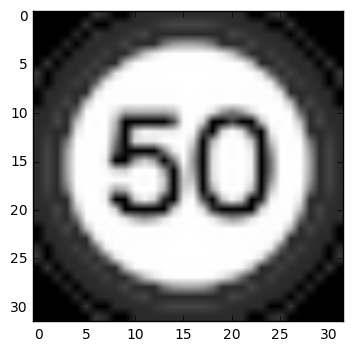

In [101]:
import matplotlib.image as mpimg

# Note that all 8 images were found online in the public domain and later modified into the shape that fits the model. 
my_images = []
for i in range(8):
    image_path = './p' + str(i) + '.jpg'
    image = mpimg.imread(image_path)
    grey_image = greyed_image(image)
    my_images.append(grey_image.squeeze())
    
# note that imshow expect shape (32, 32) instead of (32, 32, 1).
# need to convert to (32, 32, 1) later on.
plt.imshow(my_images[0], cmap='gray')
plt.show()

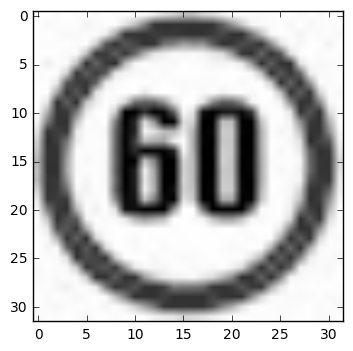

In [107]:
plt.imshow(my_images[1], cmap='gray')
plt.show()

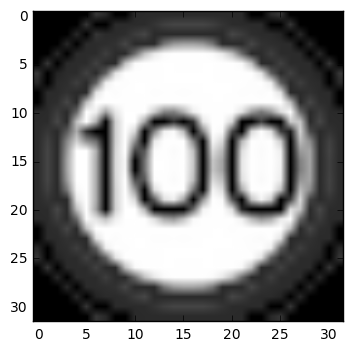

In [108]:
plt.imshow(my_images[2], cmap='gray')
plt.show()

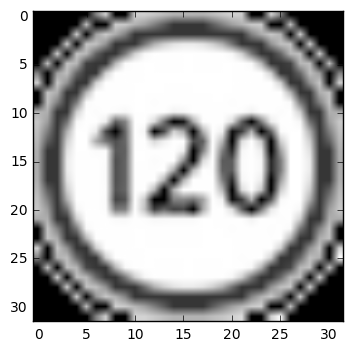

In [109]:
plt.imshow(my_images[3], cmap='gray')
plt.show()

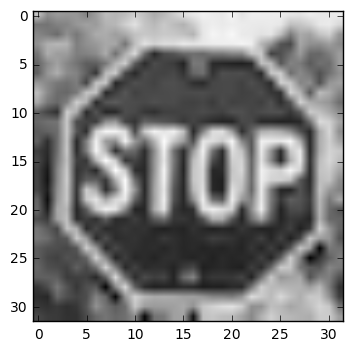

In [110]:
plt.imshow(my_images[4], cmap='gray')
plt.show()

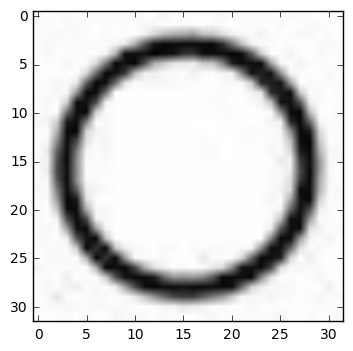

In [111]:
plt.imshow(my_images[5], cmap='gray')
plt.show()

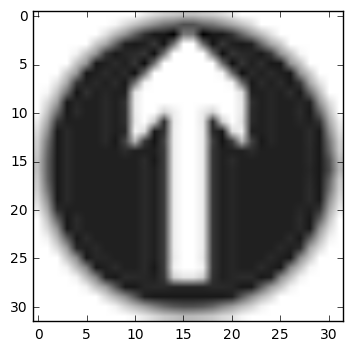

In [112]:
plt.imshow(my_images[6], cmap='gray')
plt.show()

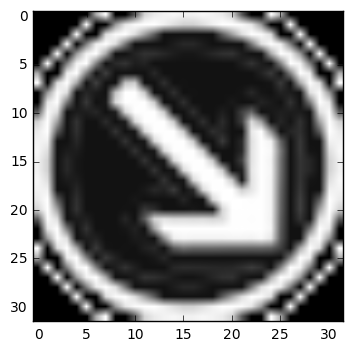

In [102]:
plt.imshow(my_images[7], cmap='gray')
plt.show()

In [103]:
my_test_images = []
for image in my_images:
    my_test_images.append(np.reshape(grey_image, [height, width, 1]))

In [104]:
my_test_labels = np.zeros((8, n_classes))

my_test_labels[0][2] = 1. # 50
my_test_labels[1][3] = 1. # 60
my_test_labels[2][7] = 1. # 100
my_test_labels[3][8] = 1. # 120
my_test_labels[4][14] = 1. # stop
my_test_labels[5][15] = 1. # no vehicle
my_test_labels[6][35] = 1. # ahead only
my_test_labels[7][38] = 1. # keep right

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

For the provided iamges, the traffic signs are centred in the middle, while my traffic signs take over almost entirety of the images.

In [120]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("My Testing Accuracy:", sess.run(accuracy, feed_dict={x: my_test_images, y: my_test_labels}))

My Testing Accuracy: 0.125


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

No, it doesn't perform equally well. The accuracy on the testing data is around 90%, while the accuracy for the new images is merely 12.5%, suggesting only 1 out of 8 images has been correctly identified.

In [121]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    p = sess.run(tf.nn.softmax(pred), feed_dict={x: my_test_images, y: my_test_labels})
    for p_i in p:
        values, indices = sess.run(tf.nn.top_k(p_i, k=4))
        print(values, indices)

[  1.00000000e+00   5.36983694e-15   2.75931809e-16   2.53771795e-18] [38 23 29 25]
[  1.00000000e+00   5.36983694e-15   2.75931809e-16   2.53771795e-18] [38 23 29 25]
[  1.00000000e+00   5.36983694e-15   2.75931809e-16   2.53771795e-18] [38 23 29 25]
[  1.00000000e+00   5.36983694e-15   2.75931809e-16   2.53771795e-18] [38 23 29 25]
[  1.00000000e+00   5.36983694e-15   2.75931809e-16   2.53771795e-18] [38 23 29 25]
[  1.00000000e+00   5.36983694e-15   2.75931809e-16   2.53771795e-18] [38 23 29 25]
[  1.00000000e+00   5.36983694e-15   2.75931809e-16   2.53771795e-18] [38 23 29 25]
[  1.00000000e+00   5.36983694e-15   2.75931809e-16   2.53771795e-18] [38 23 29 25]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The result is quite shocking as all of them had the same result of sequence (38 23 29 25). Also none of of the otehr signs are included in the top 5.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.